# California house price prediction

## Introduction

In this notebook, you will find a self-directed Data Science project focused on predicting housing prices in California in 1990. In this project, I will explore and analyze the California housing dataset, which is conveniently available in the popular machine learning library, scikit-learn, under the name fetch_california_housing ([link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)). This notebook will provide interesting insights into the world of Data Science, encompassing data handling, visualization, and machine learning methodologies.

## Import of libraries and dataset

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset
from sklearn.datasets import fetch_california_housing
california_dataset = fetch_california_housing()

In [2]:
# Creating a DataFrame
california = pd.DataFrame(california_dataset.data, columns=california_dataset.feature_names)

# Naming the column with the target 'MHV' (median_house_value)
california['MHV'] = california_dataset.target

## First look at the  data

General dataset information is available on the sklearn library [website](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset). The target is a column called 'MHV', which stands for Median House Value. The target is expressed in hundreds of thousands of US dollars ($100,000). The task and dataset indicate that the project will be about supervised learning and linear regression.

Information about the features in the dataset:
* **MedInc** - median income in block group (measured in tens of thousands of US Dollars)
* **HouseAge** - median house age in block group
* **AveRooms** - average number of rooms per household
* **AveBedrms** - average number of bedrooms per household
* **Population** - block group population
* **AveOccup** - average number of household members
* **Latitude** - block group latitude
* **Longitude** - block group longitude

In [3]:
# Checking the data
california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MHV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Checking the shape of DataFeame
california.shape

(20640, 9)

In [5]:
# Columns
print(california.columns.tolist())

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MHV']


In [6]:
california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MHV         20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


All features are in numeric format (float64). All values are non-null.

## Exploratory Data Analysis

In [7]:
# General data statistics
california.describe().round(4)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MHV
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MHV'}>]], dtype=object)

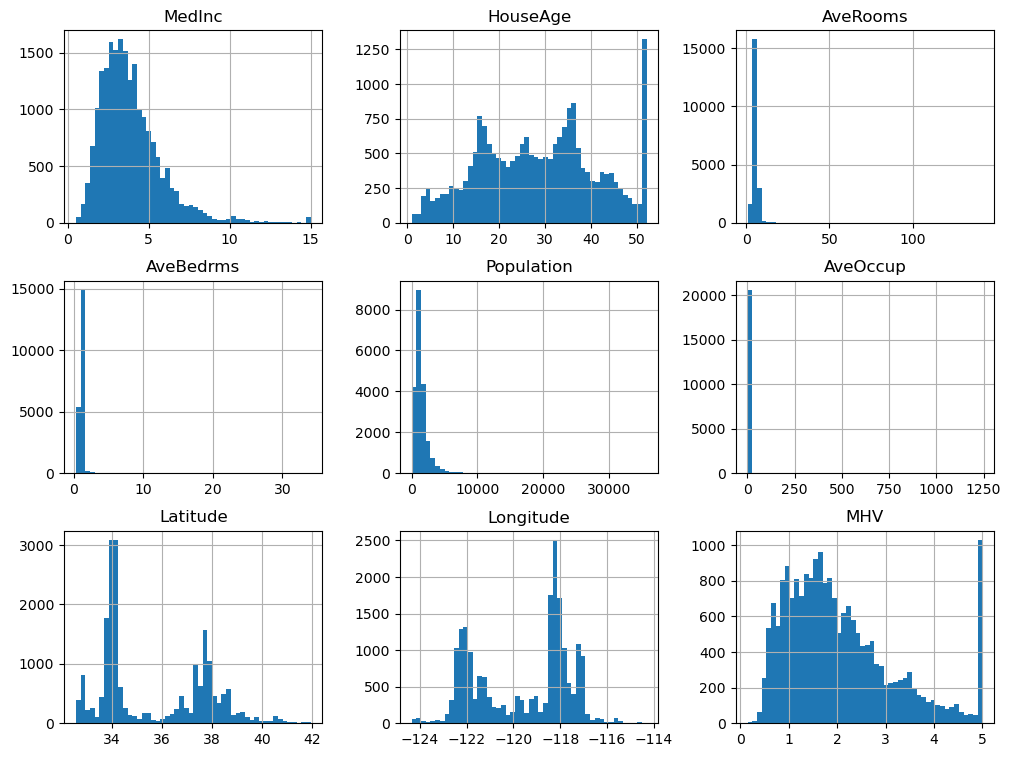

In [8]:
# General data distribution
california.hist(bins=50, figsize=(12,9))

Looking at the general statistics and data distribution, the first conclusions can be drawn:
* there is a big difference between values in the third quartile and the maximum values in the features: **MedInc**, **AveRooms**, **AveBedrms**, **Population**, **AveOccup**. These features have values in the 4th quartile that show significant variability compared to the rest of the data.
* the above-mentioned features non-**MedInc** may result from the data representation. These columns may take surprisingly large values for block groups with few households and many empty houses, such as vacation resorts.
* The feature **HouseAge** has a maximum value of 52 years, which shows a high distribution. The same is the case with the **MHV** target which has a maximum value of 5 (500,001 dollars).
* In both cases, there is a risk that the model will learn that the maximum average house age is 52 years and the maximum average house value is greater than 500,000 dollars. This can be confusing when out-of-range data is entered into the model.
* Probably **MHV** = 500,001 dollars also includes a set of houses worth more than $500,001.

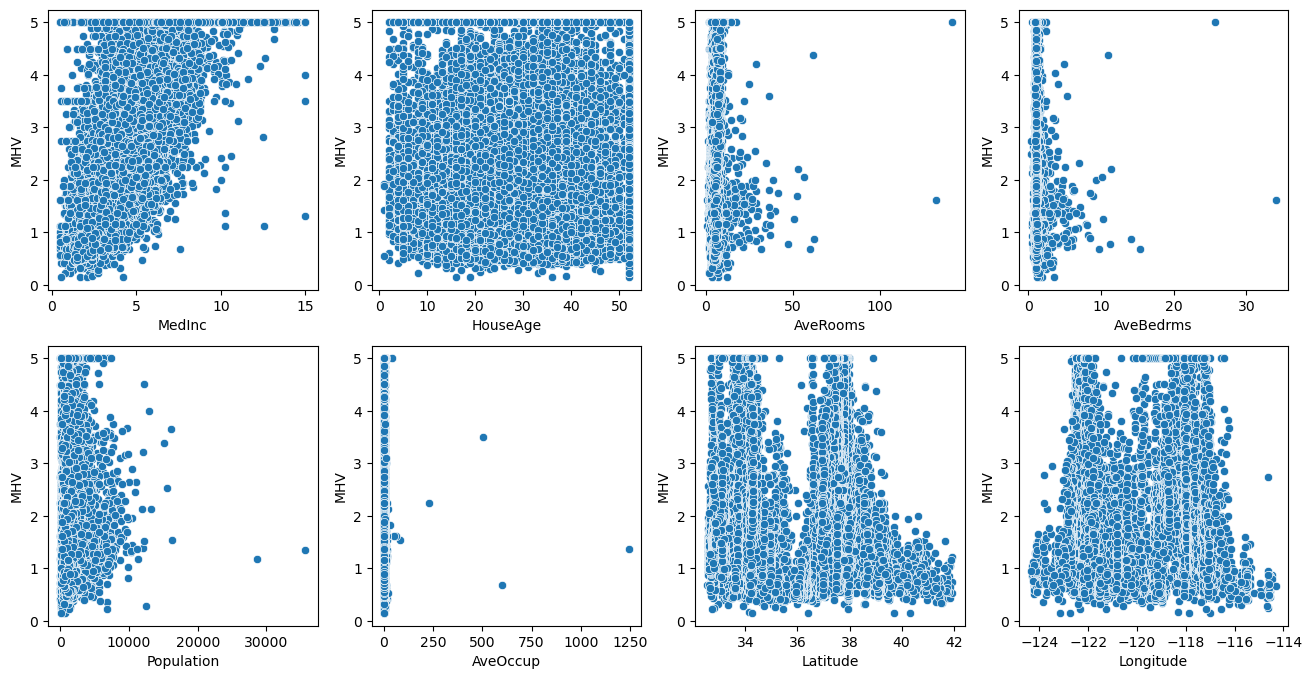

In [9]:
# Correlation between features and target

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

sns.scatterplot(ax=axes[0][0], x=california.MedInc, y=california.MHV)
sns.scatterplot(ax=axes[0][1], x=california.HouseAge, y=california.MHV)
sns.scatterplot(ax=axes[0][2], x=california.AveRooms, y=california.MHV)
sns.scatterplot(ax=axes[0][3], x=california.AveBedrms, y=california.MHV)
sns.scatterplot(ax=axes[1][0], x=california.Population, y=california.MHV)
sns.scatterplot(ax=axes[1][1], x=california.AveOccup, y=california.MHV)
sns.scatterplot(ax=axes[1][2], x=california.Latitude, y=california.MHV)
sns.scatterplot(ax=axes[1][3], x=california.Longitude, y=california.MHV)

plt.show()

#### MHV - Median House Value (the target)

In [10]:
# How many MHV > 5 (more than 500,000 dollars) and MHV = 5 (exactly 500,000 dollars) blocks of houses are in the dataset?
print((california.MHV >= 5).value_counts())
print((california.MHV == 5).value_counts())
print()

# Percentage MHV > 500,000
print("Percentage of most expansive blocks of houses: ", 
      ((california.MHV > 5).value_counts().min() / california.MHV.count() * 100).round(2),'%')

False    19648
True       992
Name: MHV, dtype: int64
False    20613
True        27
Name: MHV, dtype: int64

Percentage of most expansive blocks of houses:  4.68 %


The percentage of the most expensive houses is very high in the dataset, at 4.68%. There is a risk that the machine learning model will assume $500,001 as the highest possible amount and will incorrectly predict the prices of potentially the most expensive houses. On the other hand, it would be a big abuse to remove the rows with the maximum **MHV** values. Such a step would exclude the most attractive areas of California from the analysis. Possible steps regarding the manipulation of this data will be taken at later stages.

#### HouseAge - median house age in block group

In [11]:
# How many of the oldest houses are in the dataset?
print((california.HouseAge == 52).value_counts())
print()
# Percentage of the oldest blocks of houses
print("Percentage of the oldest blocks of houses: ", 
      ((california.HouseAge == 52).value_counts().min() / california.HouseAge.count() * 100).round(2),'%')

False    19367
True      1273
Name: HouseAge, dtype: int64

Percentage of the oldest blocks of houses:  6.17 %


In [12]:
california.groupby(california.HouseAge == 52)['MHV'].describe()

,count,mean,std,min,25%,50%,75%,max
HouseAge,,,,,,,,
False,19367.0,2.023490,1.122132,0.14999,1.183,1.761,2.574,5.00001
True,1273.0,2.754209,1.390709,0.14999,1.614,2.594,3.804,5.00001


The **HouseAvg** feature, which has values of 52 years, also includes areas with much older houses. The oldest blocks of houses are more expensive than the rest (over $70,000 more on average). The oldest houses also make up a large proportion of the data set (6.8%). The situation with this feature is a bit similar to the **MHV** target. Possible steps will be taken later in the analysis.

#### Latitude and Longitude - geagrphical features

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

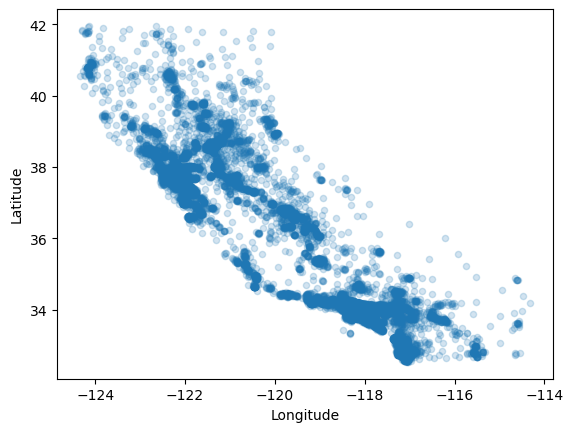

In [13]:
# Location of blocks of houses from the dataset in California
california.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.2)

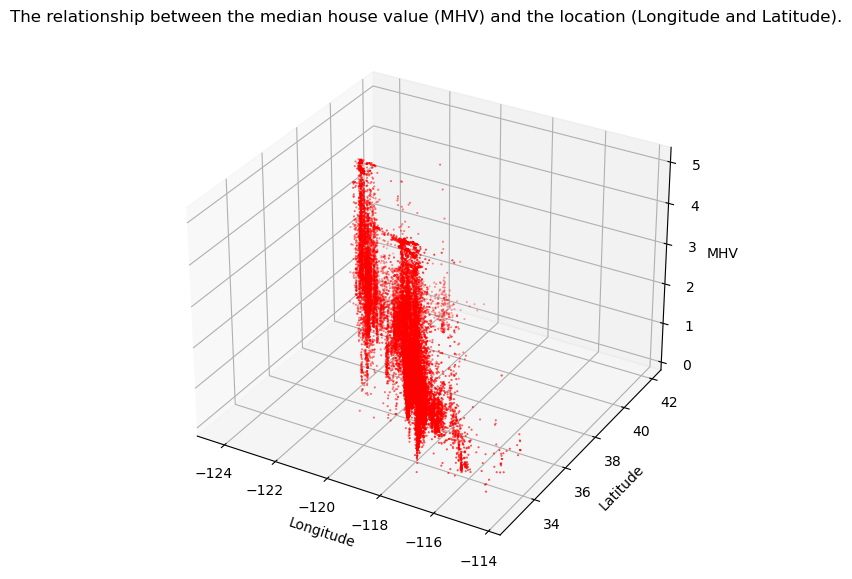

In [14]:
# Relationship of median house value (MHV) to geographical location (Latitude and Longitude) in California.

x = california.Longitude
y = california.Latitude
z = california.MHV

fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")

ax.scatter3D(x, y, z, color="red", s=0.2)
plt.title("The relationship between the median house value (MHV) and the location (Longitude and Latitude).")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("MHV")

plt.show()

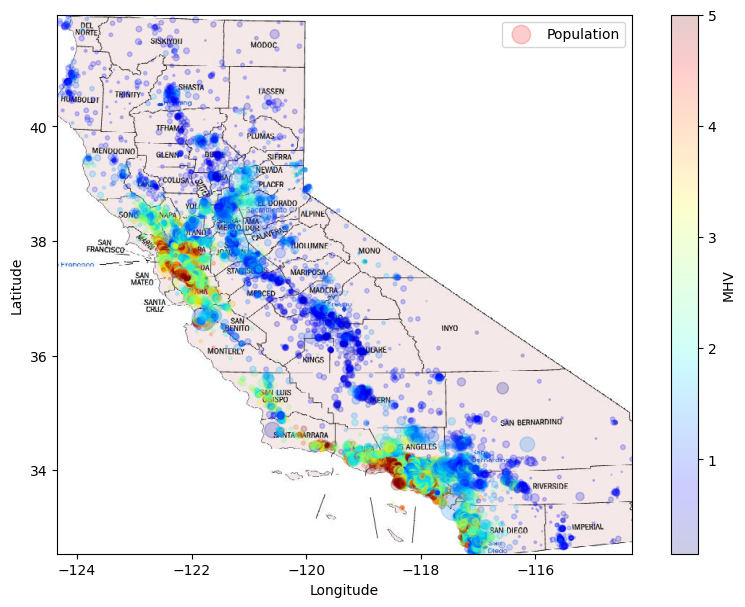

In [15]:
# Relationship of population size (Population) and median house value (MHV) to 
# geographical location (Latitude and Longitude) in California.

import cv2

plt.figure(figsize=(10, 7))
img = cv2.imread('California_map.png')

plt.imshow(img, zorder=0, extent=[california['Longitude'].min(), california['Longitude'].max(), 
                                  california['Latitude'].min(), california['Latitude'].max()])
ax = plt.gca()

california.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.2, s=california["Population"]/100,
               ax=ax, label="Population", c="MHV", cmap=plt.get_cmap("jet"), colorbar=True, zorder=5)
plt.legend()
plt.show()

The above charts show that the most expensive houses are located in the largest cities or in their vicinity, where the largest number of people live. Not surprisingly, the most expensive houses blocks are in **Los Angeles**, **Long Beach**, **Anaheim**, **San Diego**, **Santa Barbara**, **San Hose**, and **San Francisco** areas. A large population also lives in the **Fresno** and **Sacramento** areas. The contrast is northern California and areas that are increasingly far from the Pacific Ocean.

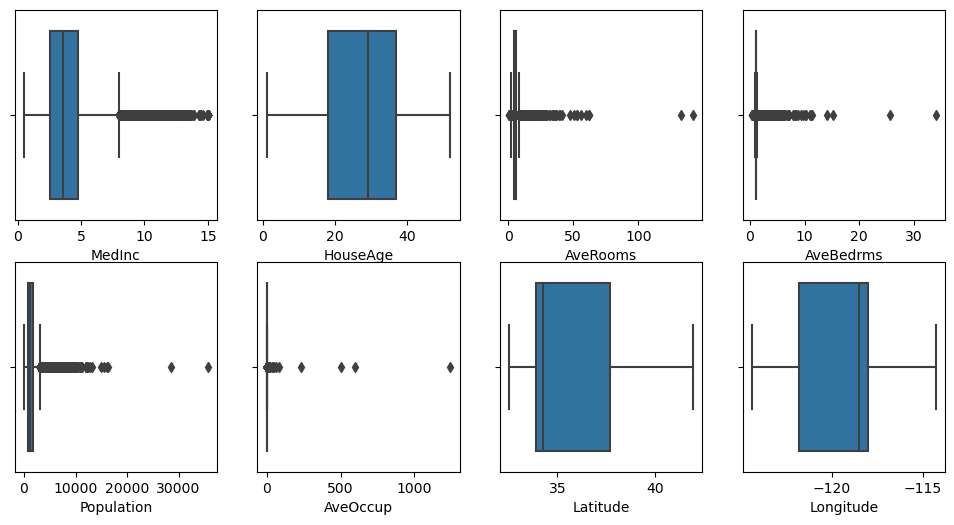

In [16]:
# Boxplots

fig, axes = plt.subplots(2, 4, figsize=(12, 6))

sns.boxplot(ax=axes[0][0], x=california.MedInc)
sns.boxplot(ax=axes[0][1], x=california.HouseAge)
sns.boxplot(ax=axes[0][2], x=california.AveRooms)
sns.boxplot(ax=axes[0][3], x=california.AveBedrms)
sns.boxplot(ax=axes[1][0], x=california.Population)
sns.boxplot(ax=axes[1][1], x=california.AveOccup)
sns.boxplot(ax=axes[1][2], x=california.Latitude)
sns.boxplot(ax=axes[1][3], x=california.Longitude)

plt.show()

The above boxplots, especially in the cases of features **MedInc**, **AveRooms**, **AveBedrms**, **Population**, **AveOccup** show high variability. This may be due to the large diversity of the entire data set (degree of urbanization of the area, types of buildings, their purpose, specificity of residents, etc.), as well as solutions related to the data presented and described earlier in the target (maximum values).

## Feature engineering

Using the **Population** and **AveOccup** features, it is possible to count the number of households per block of houses. The new **Households** feature can be used to count the exact number of rooms and bedrooms in each location. The number of rooms (**Rooms**) and bedrooms (**Bedrms**) will be new features. The ratio of the number of bedrooms (**Bedrms**) to the number of rooms (**Rooms**) also seems to be interesting, which will also constitute a new feature **Bedrms_per_Rooms**.

In [17]:
# New features

# AveOccup = Population / Households ===> Households = Population / AveOccup
california['Households'] = california['Population'] / california['AveOccup']

# AveRooms = Rooms / Households ===> Rooms = AveRooms * Households
california['Rooms'] = california['AveRooms'] * california['Households']

# AveBedrms = Bedrms / Households ===> Bedrms = AveBedrms * Households
california['Bedrms'] = california['AveBedrms'] * california['Households']

# Bedrms_per_Rooms = Bedrms / Rooms
california['Bedrms_per_Rooms'] = california['Bedrms'] / california['Rooms']

# Rooms_per_Member = Rooms / Population
california['Rooms_per_Member'] = california['Rooms'] / california['Population']

# Bedrms_per_Member = Bedrms / Population
california['Bedrms_per_Member'] = california['Bedrms'] / california['Population']

# Putting the target column (MHV) in the first place
california.insert(0, 'MHV', california.pop('MHV'))

In [18]:
# Description of the new Data Frame
california.describe()

,MHV,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Households,Rooms,Bedrms,Bedrms_per_Rooms,Rooms_per_Member,Bedrms_per_Member
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,2.068558,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,499.539680,2635.763081,537.898014,0.213075,1.976970,0.403036
std,1.153956,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,382.329753,2181.615252,421.247906,0.058023,1.146020,0.242310
min,0.149990,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,1.000000,2.000000,1.000000,0.100000,0.002547,0.000670
25%,1.196000,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,280.000000,1447.750000,295.000000,0.175426,1.522382,0.315656
50%,1.797000,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,409.000000,2127.000000,435.000000,0.203181,1.937936,0.372023
75%,2.647250,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,605.000000,3148.000000,647.000000,0.239834,2.296090,0.442652
max,5.000010,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,6082.000000,39320.000000,6445.000000,1.000000,55.222222,14.194444


The description of the new features (**Households**, **Rooms**, **BedRms**, **Bedrms_per_Rooms**, **Rooms_per_Member**, **Bedrms_per_Member**), especially their maximum values and the range of values in the fourth quartile, indicate that the study areas may contain multi-apartment blocks, hotels, recreation centers, etc.

In [19]:
# Correlation matrix
corr = california.corr()
corr.style.background_gradient(cmap="Purples")

,MHV,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Households,Rooms,Bedrms,Bedrms_per_Rooms,Rooms_per_Member,Bedrms_per_Member
MHV,1.000000,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,0.065843,0.134153,0.050594,-0.255624,0.209482,0.070602
MedInc,0.688075,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.013033,0.198050,-0.008093,-0.615479,0.237828,-0.052942
HouseAge,0.105623,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.302916,-0.361262,-0.320485,0.136367,-0.107926,-0.057154
AveRooms,0.151948,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,-0.080598,0.133798,0.000787,-0.418704,0.887282,0.713747
AveBedrms,-0.046701,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.054833,0.029494,0.045989,0.055817,0.824678,0.882568
Population,-0.024650,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.907222,0.857126,0.878026,0.037075,-0.140520,-0.133457
AveOccup,-0.023737,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.027309,-0.024581,-0.028330,0.002881,-0.053906,-0.055993
Latitude,-0.144160,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.071035,-0.036100,-0.066318,-0.114302,0.140345,0.107426
Longitude,-0.045967,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,0.055310,0.044568,0.068378,0.092868,-0.074420,-0.045694
Households,0.065843,0.013033,-0.302916,-0.080598,-0.054833,0.907222,-0.027309,-0.071035,0.055310,1.000000,0.918484,0.979829,0.067022,-0.028473,0.006006


There is a noticeable high correlation between the median income in the block group (**MedInc**) and the target (**MHV**). It seems natural that the income of residents will be correlated with the value of the houses in which they live. Also noteworthy is the good target correlation with **AveRooms** and **HouseAge**, as well as the correlation with the new features **Rooms_per_Member** and inverse correlation with **Bedrms_per_Rooms**, which is better than with the **Rooms** and **Bedrms** features separately. There is also a good correlation between the target and **Rooms**, which, however, is less than **AveRooms**.

## Data preparation for the use of Machine Learning algorithms

The dataset with target and explanatory variables will be divided into a training and a test set. All X data will be scaled using the MinMaxScaler algorithm. Using this process, the training and test sets were scaled separately.

In [20]:
# Target (MHV) and features division with a change to type on NumPy array, and checking the shape 
X = california.iloc[:, 1:]
y = california['MHV']
print(X.shape)
print(y.shape)

(20640, 14)
(20640,)


In [21]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

# Checking the shape of sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16512, 14)
(16512,)
(4128, 14)
(4128,)


In [22]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.fit(X_test)

MinMaxScaler()

In [23]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Checking the data after scaling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train_scaled_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Households,Rooms,Bedrms,Bedrms_per_Rooms,Rooms_per_Member,Bedrms_per_Member
0,0.197321,0.88,0.086900,0.055720,0.042044,0.001572,0.155579,0.640000,0.045297,0.039444,0.043133,0.091161,0.069619,0.070195
1,0.220604,0.80,0.079596,0.069886,0.041445,0.001349,0.142704,0.626667,0.049198,0.039773,0.053071,0.135294,0.071206,0.087491
2,0.149432,0.68,0.075902,0.062019,0.071913,0.001926,0.631974,0.158974,0.067620,0.052450,0.068177,0.128622,0.054257,0.064852
3,0.143108,0.86,0.086220,0.071885,0.042842,0.001394,0.711373,0.143590,0.049848,0.043090,0.054661,0.123119,0.074644,0.087177
4,0.189659,0.86,0.070633,0.052409,0.057211,0.001214,0.582618,0.232821,0.072388,0.052910,0.066786,0.121719,0.068741,0.079800


In [25]:
# Checking the data after scaling
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_scaled_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Households,Rooms,Bedrms,Bedrms_per_Rooms,Rooms_per_Member,Bedrms_per_Member
0,0.250459,0.36,0.085462,0.047341,0.077701,0.001847,0.072961,0.724103,0.075206,0.064372,0.065991,0.078038,0.061649,0.058113
1,0.305079,0.82,0.078222,0.047937,0.075306,0.001413,0.506438,0.242051,0.086909,0.069036,0.076724,0.093790,0.068215,0.069673
2,0.195046,0.32,0.072165,0.044325,0.116418,0.001753,0.630901,0.300513,0.116818,0.086738,0.099384,0.099929,0.055498,0.058379
3,0.153536,0.20,0.086251,0.068462,0.174029,0.001567,0.637339,0.293333,0.188123,0.161817,0.200358,0.116566,0.069326,0.078695
4,0.290955,0.50,0.099397,0.077856,0.035790,0.001962,0.475322,0.222564,0.033160,0.032482,0.038163,0.106402,0.067276,0.072952


## Modeling

There will be **11 Machine Learning Models** implemented. Each of them will be evaluated using the **3 metrics** used in linear regression:
* **Coefficient of Determination** (R<sup>2</sup>) - r2_score / model.score()
* **Root Mean Squared Error** (RMSE) - mean_squared_error(squared=True)
* **Mean Absolute Error** (MAE) - mean_absolute_error

After all machine learning models have been trained, the results will be placed in a summary table and summarized. 

In [26]:
# Importing metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [27]:
# A function that returns the results of machine learning models
def evaluation(model, X, y):
    """
    The evaluation function will return a DataFrame with model quality scores. 
    To use it, you will need the following parameters:
    * model - the variable to which the machine learning model is assigned,
    * X - a Pandas DataFrame with selected features,
    * y - a Pandas Series with target.
    """
    # A variable that holds model predictions
    y_pred = model.predict(X)
    
    # Linear regression scores
    r2 = r2_score(y, y_pred).round(4)
    rmse = mean_squared_error(y, y_pred, squared=False).round(4) * 100000
    mae = mean_absolute_error(y, y_pred).round(4) * 100000
    
    # A DataFrame collecting the results of all models
    metrics = pd.DataFrame({
        'R^2 score': [r2],
        'RMSE score in $': [rmse],
        'MAE score in $': [mae],
    })
    
    return metrics

#### 1. Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
linreg_scores = evaluation(linreg, X_train_scaled, y_train)

print("Coefficients: ", linreg.coef_.round(2))
print("Intercept: ", linreg.intercept_.round(2))
linreg_scores

Coefficients:  [ 5.97  0.55  1.44 -6.98 -2.62  6.51 -3.92 -4.1   1.52 -0.94  2.27  3.64
  7.38  1.89]
Intercept:  2.75


,R^2 score,RMSE score in $,MAE score in $
0,0.6647,67070.0,48500.0


#### 2. Lasso (Regularization L1)

In [29]:
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=14)
lasso.fit(X_train_scaled, y_train)
lasso_scores = evaluation(lasso, X_train_scaled, y_train)

print("Coefficients: ", lasso.coef_.round(2))
print("Intercept: ", lasso.intercept_.round(2))
lasso_scores

Coefficients:  [ 0.  0.  0. -0. -0. -0. -0. -0.  0.  0.  0. -0.  0.  0.]
Intercept:  2.07


,R^2 score,RMSE score in $,MAE score in $
0,0.0,115820.0,91600.0


#### 3. Ridge (Regularization L2)

In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=14)
ridge.fit(X_train_scaled, y_train)
ridge_scores = evaluation(ridge, X_train_scaled, y_train)

print("Coefficients: ", ridge.coef_.round(2))
print("Intercept: ", ridge.intercept_.round(2))
ridge_scores

Coefficients:  [ 6.09  0.56 -0.06 -4.69 -2.68  0.93 -3.83 -4.01  1.6  -0.4   1.81  2.93
  5.19  2.55]
Intercept:  2.84


,R^2 score,RMSE score in $,MAE score in $
0,0.6634,67200.0,48730.0


#### 4. Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=14)
dtr.fit(X_train_scaled, y_train)

dtr_scores = evaluation(dtr, X_train_scaled, y_train)
dtr_scores

,R^2 score,RMSE score in $,MAE score in $
0,1.0,0.0,0.0


#### 5. K-Nearest Neighbors Regressor (KNN)

In [32]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)

knn_scores = evaluation(knn, X_train_scaled, y_train)
knn_scores

,R^2 score,RMSE score in $,MAE score in $
0,0.8289,47900.0,31860.0


#### 6. Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(random_state=14)
rfg.fit(X_train_scaled, y_train)

rfg_scores = evaluation(rfg, X_train_scaled, y_train)
rfg_scores

,R^2 score,RMSE score in $,MAE score in $
0,0.9727,19150.0,12460.0


#### 7. AdaBoost Regressor

In [34]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=14)
ada.fit(X_train_scaled, y_train)

ada_scores = evaluation(ada, X_train_scaled, y_train)
ada_scores

,R^2 score,RMSE score in $,MAE score in $
0,0.552,77530.0,64370.0


#### 8. Gradient Boosting Regressor

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=14)
gbr.fit(X_train_scaled, y_train)

gbr_scores = evaluation(gbr, X_train_scaled, y_train)
gbr_scores

,R^2 score,RMSE score in $,MAE score in $
0,0.8077,50790.0,35460.0


#### 9. Support Vector Regressor - SVR

In [36]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_scaled, y_train)

svr_scores = evaluation(svr, X_train_scaled, y_train)
svr_scores

,R^2 score,RMSE score in $,MAE score in $
0,0.7494,57980.0,39170.0


#### 10. Multi-layer Perceptron Regressor (MLP)

In [37]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=14)
mlp.fit(X_train_scaled, y_train)

mlp_scores = evaluation(mlp, X_train_scaled, y_train)
mlp_scores

C:\Users\barte\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,R^2 score,RMSE score in $,MAE score in $
0,0.7699,55560.0,40020.0


#### 11. XGBoost Regressor (Extreme Gradient Boosting) 

In [38]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=14)
xgb.fit(X_train_scaled, y_train)

xgb_scores = evaluation(xgb, X_train_scaled, y_train)
xgb_scores

,R^2 score,RMSE score in $,MAE score in $
0,0.9471,26650.0,19030.0


In [39]:
all_scores = pd.concat([linreg_scores, lasso_scores, ridge_scores, 
                       dtr_scores, knn_scores, rfg_scores, 
                       ada_scores, gbr_scores, svr_scores, 
                       mlp_scores, xgb_scores], ignore_index=True, sort=False)

model_names_all = ['Linear Regression',
                    'Lasso',
                    'Ridge',
                    'Decision Tree',
                    'KNN',
                    'Random Froest',
                    'AdaBoost',
                    'Gradient Boosting',
                    'SVR',
                    'MLP',
                    'XGBoost'
                     ]

all_scores['Model name'] = model_names_all
first_column = all_scores.pop('Model name')
all_scores.insert(0, 'Model name', first_column)

all_scores.style.hide(axis='index')

Model name,R^2 score,RMSE score in $,MAE score in $
Linear Regression,0.664700,67070.000000,48500.000000
Lasso,0.000000,115820.000000,91600.000000
Ridge,0.663400,67200.000000,48730.000000
Decision Tree,1.000000,0.000000,0.000000
KNN,0.828900,47900.000000,31860.000000
Random Froest,0.972700,19150.000000,12460.000000
AdaBoost,0.552000,77530.000000,64370.000000
Gradient Boosting,0.807700,50790.000000,35460.000000
SVR,0.749400,57980.000000,39170.000000
MLP,0.769900,55560.000000,40020.000000


The **Random Forest Regressor** model performed best of all models. It is characterized by the highest coefficient of determination (**R<sup>2</sup> = 97.27%**), as well as the lowest values of RMSE and MAE results (**RMSE ~ 19,000 dollars** and **MAE ~ 12,500 dollars**). The **Decision Tree Regressor** model has **R<sup>2</sup> = 1** and **0 RMSE and MAE**. However, this is a symptom of overfitting, which will affect the results of the test set. The second best model was the **XGBoost Regressor** with slightly worse results (**R<sup>2</sup>  only less than 3%** relative to the best model and also higher **RMSE and MAE** values). Also noteworthy are the **K-Nearest Neighbors Regressor** and **Gradient Boosting Regressor** models with coefficients of determination **R<sup>2</sup> > 80%**. The **KNN** model has lower **RMSE and MAE** values and more by approximately **2%** better **R<sup>2</sup>**. Interestingly, the **Gradient Boosting** model shows high values of **RMSE and MAE** errors (respectively **77,530** and **64,370 dollars**). They are higher by about **10,000 dollars** for **RMSE** and **15,500 dollars** for **MAE** than with classic linear regression models (**Linear Regression** and **Ridge**), which, however, are characterized by much lower values of **R<sup>2</sup> ~ 66%**. The **R<sup>2</sup> = 0** and high **RMSE** and **MAE** for the **Lasso** model mean that the model penalty is too high and the *alpha* parameter should be changed to a lower one or e.g. the **MedInc** and/or target should be scaled to full amounts in dollars. The **AdaBoost** model scored an even lower **R<sup>2</sup> ~ 55%**, but the same error score as **Gradient Boosting**. The difference in **R<sup>2</sup>** is due to the different mechanisms of operation of both models, especially in the large impact of minor features on the **AdaBoost** model. However, this does not explains into error measurements. The **Support Vector Regressor** and **Multi-layer Perceptron Regressor** models, which show **R<sup>2</sup> > 70%** (**75%** and **77%** respectively), also give good results. Similarly to the **R<sup>2</sup>** metric, the **MLP** model based on neural networks has a little lower **RMSE** and a little higher **MAE** values. All models were implemented in their basic settings, without changing the hyperparameters (except *random_state*). Of course, each of the models can be optimized to improve the results. The Coefficient of Determination **R<sup>2</sup>** is an important metric that shows how the data is represented by the model, however, in a home price prediction project, it is neccessary to take a good look at the error values - **RMSE** and **MAE**. It is important that these errors are kept as low as possible so that home prices in areas of California can be predicted with the greatest accuracy and reliability. 


The two best models:

1. **Random Forest Regressor**
2. **XGBoost Regressor**

will be analyzed further. The analysis will concern the feature importance used in the training process, re-training the model on modified data and optimizing hyperparameters and parameters.

In [40]:
# Function for plotting feature importance barpolts

def feat_imp_plot(imp, cols, model):

    # Creating numpy arrays using feature importance and features columns
    feat_imp = np.array(imp)
    feat_col = np.array(cols)

    # Creating a DataFrame using a dictionary
    feat_imp_df = pd.DataFrame({'feature_names':feat_col,'feature_importance':feat_imp})

    # Sorting the features in the DataFrame in order decreasing feature importance
    feat_imp_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    # Ploting Searborn bar chart
    plt.figure(figsize=(5,5))
    sns.barplot(x=feat_imp_df['feature_importance'], y=feat_imp_df['feature_names'])
    plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
    plt.title(model + '- Feature Importance')
    plt.xlabel(' Feature Importance')
    plt.ylabel('Features')

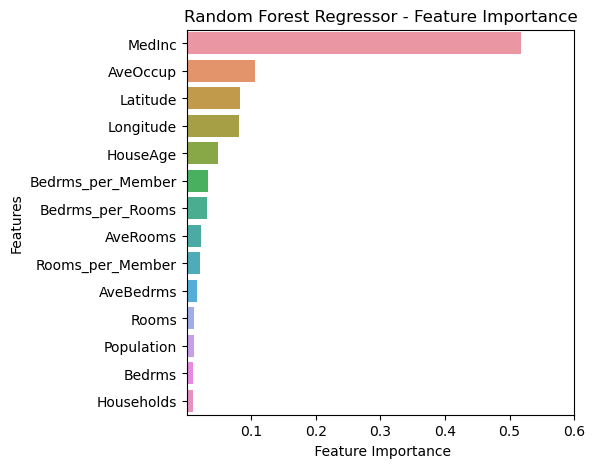

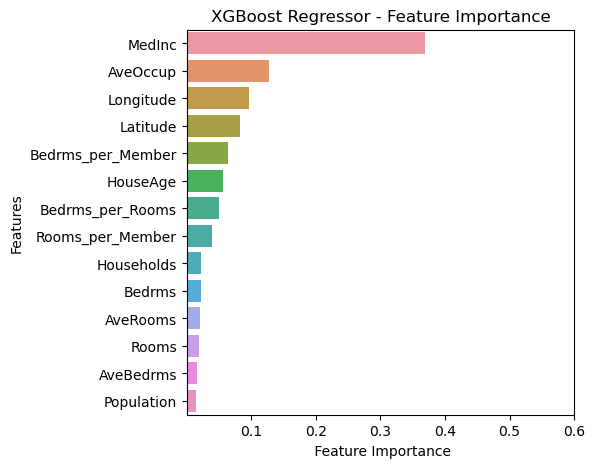

In [41]:
feat_imp_plot(rfg.feature_importances_, X_train.columns, 'Random Forest Regressor ')
feat_imp_plot(xgb.feature_importances_, X_train.columns, 'XGBoost Regressor ')

For both models, the median income (**MedInc**) is the most important factor influencing the model being trained. This is consistent with the highest correlation of this feature with the target and in line with intuition - the richest will be able to afford the most expensive houses. The average number of household members (**AveOccup**) is the second most influential feature for both models. **AveOccup's** correlation with the target was the weakest of all, but it turned out to be one of the key factors in the models building. Next, come the geographic features - **Longitude** and **Latitude**. Understandably, the location of the house will have a big impact on the price of this house. This is consistent with the previous charts. For the **Random Forest** model, **Latitude** is slightly more important than **Longitude**, and vice versa for the **XGBoost** model. Also in the middle of the most important features is **Bedrms_per_Rooms**, which, like the previous feature, has a much greater impact on models than the other new features from which it is derived, i.e. **Rooms**, **Bedrms**, **AveRooms** and **AveBedrms**. **Households** and **Population** also show little effect on trained models. Both models are compatible with the first 4 key features, followed by the same next 3 features in a different order of importance. The impact of the other 7 features depends on the model used. According to the graph, **MedInc** has a greater impact on the **Random Forest** model than **XGBoost**. The **XGBoost** model gives other features higher importance than **Random Forest**.

The data will be retrained by the models on the 7 features with the highest feature importance. The results will be compared with each other and with the previous ones from the entire dataset. 

Features for the new dataset:
* **MedInc**
* **AveOccup**
* **Latitude**
* **Longitude**
* **HouseAge**
* **Bedrms_per_Member**
* **Bedrms_per_Rooms**

In [42]:
# New explanatory variable X based on feature importance plots
X_new = california[['MedInc', 'AveOccup', 'Latitude', 'Longitude', 'HouseAge', 'Bedrms_per_Member', 'Bedrms_per_Rooms']]

In [43]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y, test_size=0.2, random_state=14)

In [44]:
# Scaling the new data
scaler.fit(X_new_train)
scaler.fit(X_new_test)

MinMaxScaler()

In [45]:
X_new_train_sc = scaler.transform(X_new_train)
X_new_test_sc = scaler.transform(X_new_test)

#### Random Forest Regressor

In [46]:
rfg_new = RandomForestRegressor(random_state=14)
rfg_new.fit(X_new_train_sc, y_new_train)
rfg_new_scores = evaluation(rfg_new, X_new_train_sc, y_new_train)
rfg_new_scores

,R^2 score,RMSE score in $,MAE score in $
0,0.9733,18940.0,12190.0


#### Extreme Gradient Boosting (XGBoost Regressor)

In [47]:
xgb_new = XGBRegressor(random_state=14)
xgb_new.fit(X_new_train_sc, y_new_train)
xgb_new_scores = evaluation(xgb_new, X_new_train_sc, y_new_train)
xgb_new_scores

,R^2 score,RMSE score in $,MAE score in $
0,0.9387,28670.0,20100.0


In [48]:
new_scores = pd.concat([rfg_new_scores, rfg_scores, xgb_new_scores, xgb_scores], 
                       ignore_index=True, sort=False)
model_names = ['Random Forest with 7 features',
              'Random Forest with all features',
              'XGBoost with 7 features',
              'XGBoost with all features']
new_scores['Model name'] = model_names
first_column = new_scores.pop('Model name')
new_scores.insert(0, 'Model name', first_column)

new_scores.style.hide(axis='index')

Model name,R^2 score,RMSE score in $,MAE score in $
Random Forest with 7 features,0.973300,18940.000000,12190.000000
Random Forest with all features,0.972700,19150.000000,12460.000000
XGBoost with 7 features,0.938700,28670.000000,20100.000000
XGBoost with all features,0.947100,26650.000000,19030.000000


The **Random Forest Regressor** model returns better results with more general data (fewer features). This can be seen by a slight increase in the value of the **R<sup>2</sup>** score, as well as lower **RMSE** value. The **XGBoost Regressor** model turned out to be better (**R<sup>2</sup>** higher by about 1%) using all the learning features for training. Both winning models improved their **RMSE** score, which may indicate a reduction in deviations compared to the models trained on the modified data. 

All models will be tested on both data sets (*X_new_test_sc* - 7 features & *X_test_scaled* - all features).

## Testing the models

In [49]:
# Prediction of the test set (7 features) based on the Random Forest Regressor model
rfg_new_test_scores = evaluation(rfg_new, X_new_test_sc, y_new_test)
rfg_new_test_scores

,R^2 score,RMSE score in $,MAE score in $
0,0.8122,49250.0,31880.0


In [50]:
# Prediction of the test set (all features) based on the Random Forest Regressor model
rfg_test_scores = evaluation(rfg, X_test_scaled, y_test)
rfg_test_scores

,R^2 score,RMSE score in $,MAE score in $
0,0.8128,49170.0,32420.0


In [51]:
# Prediction of the test set (7 features) based on the XGBoost Regressor model
xgb_new_test_scores = evaluation(xgb_new, X_new_test_sc, y_new_test)
xgb_new_test_scores

,R^2 score,RMSE score in $,MAE score in $
0,0.8366,45940.0,30290.0


In [52]:
# Prediction of the test set (all features) based on the XGBoost Regressor model
xgb_test_scores = evaluation(xgb, X_test_scaled, y_test)
xgb_test_scores

,R^2 score,RMSE score in $,MAE score in $
0,0.8313,46680.0,30840.0


In [53]:
test_scores = pd.concat([rfg_new_test_scores, rfg_test_scores, xgb_new_test_scores, xgb_test_scores], 
                        ignore_index=True, sort=False)
model_names = ['Random Forest with 7 features',
              'Random Forest with all features',
              'XGBoost with 7 features',
              'XGBoost with all features']
test_scores['Model name'] = model_names
first_column = test_scores.pop('Model name')
test_scores.insert(0, 'Model name', first_column)

new_scores.style.hide(axis='index')

Model name,R^2 score,RMSE score in $,MAE score in $
Random Forest with 7 features,0.973300,18940.000000,12190.000000
Random Forest with all features,0.972700,19150.000000,12460.000000
XGBoost with 7 features,0.938700,28670.000000,20100.000000
XGBoost with all features,0.947100,26650.000000,19030.000000


All models have lower **R<sup>2</sup>** scores (over 80%) and higher **RMSE** and **MAE** errors on the test sets than on the training sets. Interestingly, this time the **XGBoost** model has better results. This applies to the R<sup>2</sup> results and errors. High **RMSE** and **MAE** error values (more than 2.5 times higher for the **Random Forest** test suite and more than 1.5 times higher for the **XGBoost** test suites) indicate that price projections housing may not be satisfactory. The **XGBoost** model is better at predicting house prices, but the average error is still in the range of **30,290 − 45,940 dollars**. This may not be a big mistake in considering the prices of the most expensive houses but in the context of the cheaper ones it is already a lot (the lowest average target value is **MHV** = **15,000 dollars**). The above-mentioned distribution of the prices of the most expensive houses (**MHV >500,000 dollars**) may have an impact on the prediction of the model.

## Searching for the best parameters of models

The models: **Random Forest** and **XGBoost** will be cross-validated using the **RandomizedSearchCV** algorithm. Cross-validation will be applied to the full data pool (*X_train_scaled, X_test_scaled*, models: *rfg* and *xgb*) and to a limited number of features (*X_new_train_sc, X_new_test_sc*, models: *rfg_new* and *xgb_new*). The **scoring** parameter will be set to *'neg_mean_squared_error'* to minimize the RMSE.

#### Random Forest Regressor (7 features)

In [54]:
# Importing RandomSearchCV 
from sklearn.model_selection import RandomizedSearchCV

# Specifying a range of hyperparameters to search randomly
parameters_rfg = {
    'n_estimators': [100, 200, 300],   # The number of trees in the forest
    'max_depth': [None, 5, 10, 20],    # Maximum allowed depth of the trees
    'min_samples_split': [2, 5, 10],   # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # The minimum number of samples required to be at a leaf node
}

# Creating a RandomizedSearchCV object
random_search_rfg_new = RandomizedSearchCV(estimator=rfg_new, param_distributions=parameters_rfg, n_iter=10,
                                   cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=14)

# Starting a random search
random_search_rfg_new.fit(X_new_train_sc, y_new_train)

# Choosing the best model
best_rfg_new = random_search_rfg_new.best_estimator_

rfg_new_rscv_scores = evaluation(random_search_rfg_new, X_new_test_sc, y_new_test)

print("Best model: ", best_rfg_new)
print("Best model parameters: ", random_search_rfg_new.best_params_)
rfg_new_rscv_scores

Best model:  RandomForestRegressor(n_estimators=300, random_state=14)
Best model parameters:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


,R^2 score,RMSE score in $,MAE score in $
0,0.8143,48970.0,31610.0


#### Random Forest Regressor (all features)

In [55]:
# Creating a RandomizedSearchCV object
random_search_rfg = RandomizedSearchCV(estimator=rfg, param_distributions=parameters_rfg, n_iter=10,
                                   cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=14)

# Starting a random search
random_search_rfg.fit(X_train_scaled, y_train)

# Choosing the best model
best_rfg = random_search_rfg.best_estimator_

rfg_rscv_scores = evaluation(random_search_rfg, X_test_scaled, y_test)

print("Best model: ", best_rfg)
print("Best model parameters: ", random_search_rfg.best_params_)
rfg_rscv_scores

Best model:  RandomForestRegressor(n_estimators=300, random_state=14)
Best model parameters:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


,R^2 score,RMSE score in $,MAE score in $
0,0.8151,48870.0,32230.0


#### XGBoost Regressor (7 features)

In [56]:
# Specifying a range of hyperparameters to search randomly
parameters_xgb = {
    'booster': ['gbtree', 'gblinear'],                 # The classifier
    'learning_rate': [0.01, 0.1, 0.2],                 # Learning rate for the gradient boosting algorithm
    'n_estimators': [100, 200, 300],                   # Number of estimators (trees)
    'max_depth': [3, 5, 7],                            # Maximum allowed depth of the trees
    'min_child_weight': [1, 3, 5],                     # Minimum sum of weights needed in each child node for a split
    'subsample': [0.8, 0.9, 1.0],                      # Subsample ratio from the training set
    'colsample_bytree': [0.8, 0.9, 1.0],               # Subsample ratio for the columns used, for each tree
    'gamma': [0, 0.1, 0.2],                            # Minimum loss reduction required for any update to the tree
}

# Creating a RandomizedSearchCV object
random_search_xgb_new = RandomizedSearchCV(estimator=xgb_new, param_distributions=parameters_xgb, n_iter=10,
                                   cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=14)

# Starting a random search
random_search_xgb_new.fit(X_new_train_sc, y_new_train)

# Choosing the best model
best_xgb_new = random_search_xgb_new.best_estimator_

xgb_new_rscv_scores = evaluation(random_search_xgb_new, X_new_test_sc, y_new_test)

print("Best model: ", best_xgb_new)
print("Best model parameters: ", random_search_xgb_new.best_params_)
xgb_new_rscv_scores

Best model:  XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=14, ...)
Best model parameters:  {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8, 'booster': 'gbtree'}


,R^2 score,RMSE score in $,MAE score in $
0,0.8475,44380.0,29160.0


#### XGBoost Regressor (all features)

In [57]:
# Creating a RandomizedSearchCV object
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=parameters_xgb, n_iter=10,
                                   cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=14)

# Starting a random search
random_search_xgb.fit(X_train_scaled, y_train)

# Choosing the best model
best_xgb_cv = random_search_xgb.best_estimator_

xgb_rscv_scores = evaluation(random_search_xgb, X_test_scaled, y_test)

print("Best model: ", best_xgb_cv)
print("Best model parameters: ", random_search_xgb.best_params_)
xgb_rscv_scores

Best model:  XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=14, ...)
Best model parameters:  {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8, 'booster': 'gbtree'}


,R^2 score,RMSE score in $,MAE score in $
0,0.8417,45210.0,29990.0


In [58]:
summary_scores = pd.concat([rfg_new_rscv_scores, rfg_rscv_scores, xgb_new_rscv_scores, rfg_rscv_scores], 
                        ignore_index=True, sort=False)
model_names = ['Random Forest with 7 features',
              'Random Forest with all features',
              'XGBoost with 7 features',
              'XGBoost with all features']
summary_scores['Model name'] = model_names
first_column = summary_scores.pop('Model name')
summary_scores.insert(0, 'Model name', first_column)

summary_scores.style.hide(axis='index')

Model name,R^2 score,RMSE score in $,MAE score in $
Random Forest with 7 features,0.814300,48970.000000,31610.000000
Random Forest with all features,0.815100,48870.000000,32230.000000
XGBoost with 7 features,0.847500,44380.000000,29160.000000
XGBoost with all features,0.815100,48870.000000,32230.000000


## Conclusions

The project addresses the task of predicting house prices in specific regions of California during 1990. The dataset used in this project is sourced from the sklearn library (*fetch_california_housing*). The data was preprocessed, followed by exploratory data analysis (EDA) and the creation of new features (feature engineering). This processed dataset was then utilized to train 11 different machine learning models employing linear regression.

Out of the various models evaluated, particular attention was given to two models, namely **Random Forest Regressor** and **XGBoost Regressor**, which exhibited the most promising outcomes. Additionally, these models were trained using a subset of features (top 7) that displayed the highest feature importance scores. Subsequently, the models underwent testing and cross-validation through the **RandomizedSearchCV** technique to identify optimal parameters and hyperparameters.

The evaluation process aimed at minimizing the **RMSE** (Root Mean Squared Error) values during the search for optimal parameters, as optimizing for the **MAE** (Mean Absolute Error) often leads to a substantially prolonged process. The most optimal model turned out to be the **XGBoost Regressor** model, which trained the 7 most important features, showing the best performance in all indicators: **R<sup>2</sup> = 0.8475**, **RMSE = 44,376 dollars** and **MAE = 29,162 dollars**.

A notable disparity between the results of the training and testing sets could indicate potential overfitting. This is particularly noticeable in the case of the **Random Forest Regressor** model. Given the diverse range of house types prevalent in the California regions in 1990—including single homes, apartment complexes, residences, and vacation homes—the model is quite proficient at handling such a wide variety of data.

PS It is worth highlighting that the XGBRegressor model represents a highly sophisticated tool in the context of the project's addressed problem. It's akin to unwrapping a present with a chainsaw. The primary objective of the showcased project was to acquire and exercise skills in linear regression within the realm of machine learning.